In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from tkinter import *
from tkinter import messagebox
from tkinter import ttk

In [2]:
df = pd.read_csv("Medicaldataset.csv")
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
df['Result'] = df['Result'].map({'positive': 1, 'negative': 0})
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [4]:
x = df.drop('Result', axis=1).values
y = df['Result'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
score = []
max_depth_range = range(1, 11)

for x in max_depth_range:
    model = tree.DecisionTreeClassifier(max_depth= x, random_state = 42)
    model.fit(x_train, y_train)
    m = model.score(x_test,y_test)
    score.append(m)
    print('Accuracy value for depth= ' , x , 'is:', m)

Accuracy value for depth=  1 is: 0.8636363636363636
Accuracy value for depth=  2 is: 0.9810606060606061
Accuracy value for depth=  3 is: 0.9772727272727273
Accuracy value for depth=  4 is: 0.9772727272727273
Accuracy value for depth=  5 is: 0.9772727272727273
Accuracy value for depth=  6 is: 0.9772727272727273
Accuracy value for depth=  7 is: 0.9772727272727273
Accuracy value for depth=  8 is: 0.9772727272727273
Accuracy value for depth=  9 is: 0.9772727272727273
Accuracy value for depth=  10 is: 0.9772727272727273


In [7]:
y_pred = model.predict(x_test)

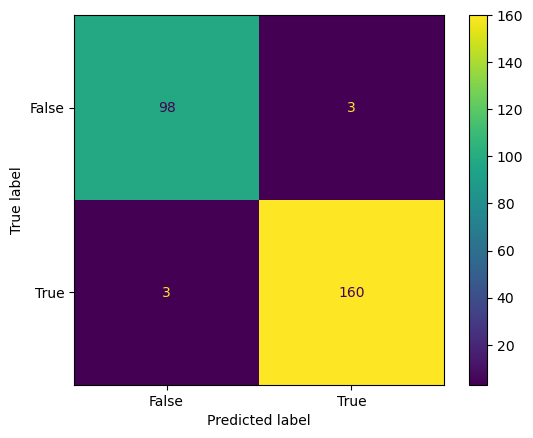

In [8]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

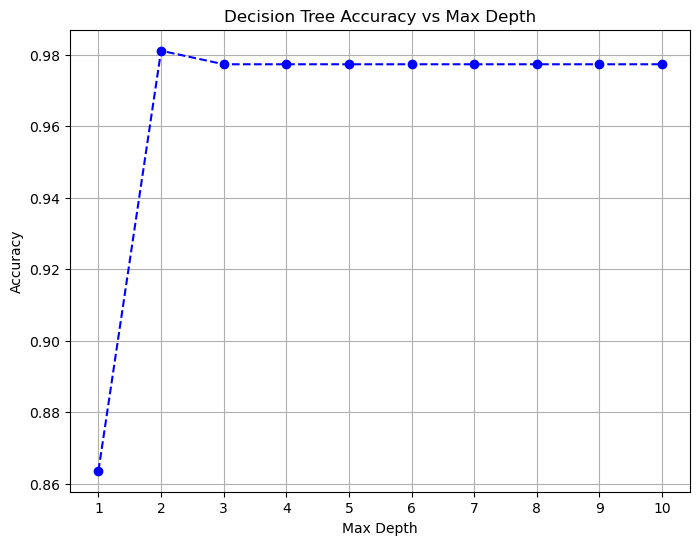

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, score, marker='o', linestyle='--', color='b')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_range)
plt.grid(True)
plt.show()

In [10]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print({"Accuracy":Accuracy})

{'Accuracy': 0.9772727272727273}


In [11]:
#making the root
root = Tk()
root.title("Data Entry Form")
root.geometry("660x300")

#a title for the gui
title = Label(root, text="Data Entry Form",font="calibre 20 bold")
title.grid(row=0, column=0,pady=10, columnspan=4)

#making every label and its entry as a grid
input_label = Label(root, text="Age: ",font="calibre 12")
input_label.grid(row=1, column=0)

age = Entry(root, width=20)
age.grid(row=1, column=1,padx=15, pady=10)


input_label = Label(root, text="Gender: ",font="calibre 12")
input_label.grid(row=2, column=0)

gender = Entry(root, width=20)
gender.grid(row=2, column=1,padx=15, pady=10)


input_label = Label(root, text="Heart rate: ",font="calibre 12")
input_label.grid(row=3, column=0)

heart_rate= Entry(root, width=20)
heart_rate.grid(row=3, column=1,padx=15, pady=10)


input_label = Label(root, text="Systolic blood pressure: ",font="calibre 12")
input_label.grid(row=4, column=0)

systolic_blood_pressure= Entry(root, width=20)
systolic_blood_pressure.grid(row=4, column=1,padx=15, pady=10)


input_label = Label(root, text="Diastolic blood pressure: ",font="calibre 12")
input_label.grid(row=5, column=0)

diastolic_blood_pressure= Entry(root, width=20)
diastolic_blood_pressure.grid(row=5, column=1,padx=15, pady=10)


input_label = Label(root, text="Blood sugar: ",font="calibre 12")
input_label.grid(row=1, column=4)

blood_sugar = Entry(root, width=20)
blood_sugar.grid(row=1, column=5,padx=15, pady=10)


input_label = Label(root, text="CK-Mb: ",font="calibre 12")
input_label.grid(row=2, column=4)

ck_mb= Entry(root, width=20)
ck_mb.grid(row=2, column=5,padx=15, pady=10)


input_label = Label(root, text="Troponin: ",font="calibre 12")
input_label.grid(row=3, column=4)

troponin = Entry(root, width=20)
troponin.grid(row=3, column=5,padx=15, pady=10)

#my function
def button_clicked():
    parameter1=age.get()
    parameter2=gender.get()
    parameter3=heart_rate.get()
    parameter4=systolic_blood_pressure.get()
    parameter5=diastolic_blood_pressure.get()
    parameter6=blood_sugar.get()
    parameter7=ck_mb.get()
    parameter8=troponin.get()
    
    if not all([parameter1, parameter2,parameter3,parameter4,parameter5,parameter6,parameter7,parameter8]):
        messagebox.showerror("Error", "All parameters are required!")
    
    input_data = [[parameter1, parameter2, parameter3, parameter4, parameter5, parameter6, parameter7, parameter8]]
    
    prediction = model.predict(input_data)
    
    if (prediction == 1):
        messagebox.showinfo("Prediction", f"The predicted outcome is: Positive")
    else:
        messagebox.showinfo("Prediction", f"The predicted outcome is: Negative")

#making button
button = Button(root, text="Predict !!", command=button_clicked,font="calibre 10")
button.grid(row=10, column=3)

root.mainloop()